#**주차 수요 예측**
# 단계2 : 탐색적 데이터 분석

## 0.미션

* 단계1 에서 생성한 base_data에 대해서 탐색적 분석을 수행합니다.
* 1) 단변량 분석
    * 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스를 파악합니다.
* 2) 이변량 분석
    * Target은 실차량수(숫자) 입니다. 
    * 숫자형 feature --> 숫자형 Target 에 대해 전체 상관계수를 구해 확인합니다.
        * 상관계수가 높은 feature들에 대해 따로 산점도를 그려 확인합니다.
    * 범주형 feature --> 숫자형 Target
        * 평균 비교 barplot(sns.barplot)을 활용하여 비교합니다.
* 3) 전처리 추가 
    * 범주형 feature 중에는 적은 수의 범주가 포함되어 있습니다. 가능한 범주끼리 묶어 봅시다. 

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.

    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 불러오기

#### 1) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import scipy.stats as spst   

#### 2) 한글 폰트 설정


In [4]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

### (4) 데이터 불러오기

* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다.

In [5]:
file1 = 'base_data.pkl'
base_data = joblib.load(path + file1)

In [6]:
print(base_data.shape)

(345, 18)


In [7]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   단지코드         345 non-null    object 
 1   총세대수         345 non-null    int64  
 2   지역           345 non-null    object 
 3   준공연도         345 non-null    int64  
 4   건물형태         339 non-null    object 
 5   난방방식         319 non-null    object 
 6   승강기설치여부      322 non-null    object 
 7   실차량수         345 non-null    int64  
 8   총면적          345 non-null    float64
 9   전용면적_10_30   345 non-null    int64  
 10  전용면적_30_40   345 non-null    int64  
 11  전용면적_40_50   345 non-null    int64  
 12  전용면적_50_60   345 non-null    int64  
 13  전용면적_60_70   345 non-null    int64  
 14  전용면적_70_80   345 non-null    int64  
 15  전용면적_80_200  345 non-null    int64  
 16  임대보증금        345 non-null    float64
 17  임대료          345 non-null    float64
dtypes: float64(3), int64(10), object(5)
memory usage: 

## 2.탐색적 데이터분석

* **세부 요구사항**
    * 기본 분석
        * 기초 통계량, NaN 값 확인 등 기본 분석을 수행합니다.
    * 단변량 분석 
        - 단일 변수로 분석 : 등록차량수, 총세대수, 버스정류장수, 지하철역수, 공가수, 임대료, 보증금
        - 여러 변수를 묶어서 분석 : 건물구분, 공급유형
    * 이변량 분석
        - 전체 상관계수를 구하고 시각화 합니다.
        - 상관계수가 높은 변수에 대한 산점도를 구해봅니다.

### (1) 기본 분석

* **세부 요구사항**
    - 데이터프레임 전체에 대한 기초통계량을 구합니다.
    - NaN을 확인해 봅시다.

In [8]:
base_data.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,345.0,5.467594e+02,4.323595e+02,1.00,1.780000e+02,491.00,853.00,2.289000e+03
준공연도,345.0,2.006710e+03,8.169892e+00,1970.00,2.001000e+03,2008.00,2013.00,2.022000e+03
실차량수,345.0,5.554319e+02,3.746405e+02,21.00,2.580000e+02,498.00,822.00,1.657000e+03
총면적,345.0,2.632487e+04,2.098324e+04,49.69,8.483260e+03,23018.23,38910.14,1.128894e+05
전용면적_10_30,345.0,4.583768e+01,1.611337e+02,0.00,0.000000e+00,0.00,0.00,1.181000e+03
전용면적_30_40,345.0,1.695130e+02,2.229351e+02,0.00,0.000000e+00,68.00,298.00,1.429000e+03
전용면적_40_50,345.0,1.474551e+02,2.166756e+02,0.00,0.000000e+00,0.00,264.00,1.258000e+03
전용면적_50_60,345.0,1.328899e+02,2.529471e+02,0.00,0.000000e+00,0.00,150.00,1.444000e+03
전용면적_60_70,345.0,1.852174e+00,3.277129e+01,0.00,0.000000e+00,0.00,0.00,6.080000e+02
전용면적_70_80,345.0,1.689565e+01,7.644200e+01,0.00,0.000000e+00,0.00,0.00,7.560000e+02


In [9]:
base_data.isna().sum()

단지코드            0
총세대수            0
지역              0
준공연도            0
건물형태            6
난방방식           26
승강기설치여부        23
실차량수            0
총면적             0
전용면적_10_30      0
전용면적_30_40      0
전용면적_40_50      0
전용면적_50_60      0
전용면적_60_70      0
전용면적_70_80      0
전용면적_80_200     0
임대보증금           0
임대료             0
dtype: int64

### (2) 단변량 분석



* **세부 요구사항**
    - 주요 변수들의 분포를 살펴보며 비즈니스를 파악합시다.
    - 단일 변수로 분석
        * 대상 : 등록차량수, 총세대수, 버스정류장수, 지하철역수, 공가수, 임대료, 보증금
        * 도구 : 기초통계량, boxplot, histogram 을 통한 데이터 분포 파악
    - 여러 변수를 묶어서 분석 : 전용면적, 건물구분, 공급유형
        * pd.melt를 이용하여 pivot을 해제하고
        * sns.barplot으로 그래프를 그려서 비교해 봅시다. 

In [10]:
# 탐색적데이터분석을 위한 함수 : 숫자형 변수
def eda_1_n(data, var, bins = 30) :
    display(data[[var]].describe().T)
    print('-' * 70)
    
    plt.figure(figsize = (8,6))
    plt.subplot(2,1,1)
    sns.histplot(x=var, data = data, bins = 20, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x=var, data = data)
    plt.grid()

    plt.tight_layout()
    plt.show()

In [11]:
# 탐색적데이터분석을 위한 함수 : 범주형 변수
def eda_1_c(data, var) :
    print(f'<< {var} >>')
    temp1 = data[var].value_counts()
    temp2 = data[var].value_counts(normalize = True)
    temp3 = pd.DataFrame({'class':temp1.index, 'count':temp1.values, 'prop':temp2.values})
    display(temp3)
    print('-' * 70)
    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

#### 1) 실차량수

,count,mean,std,min,25%,50%,75%,max
실차량수,345.0,555.431884,374.640474,21.0,258.0,498.0,822.0,1657.0


----------------------------------------------------------------------


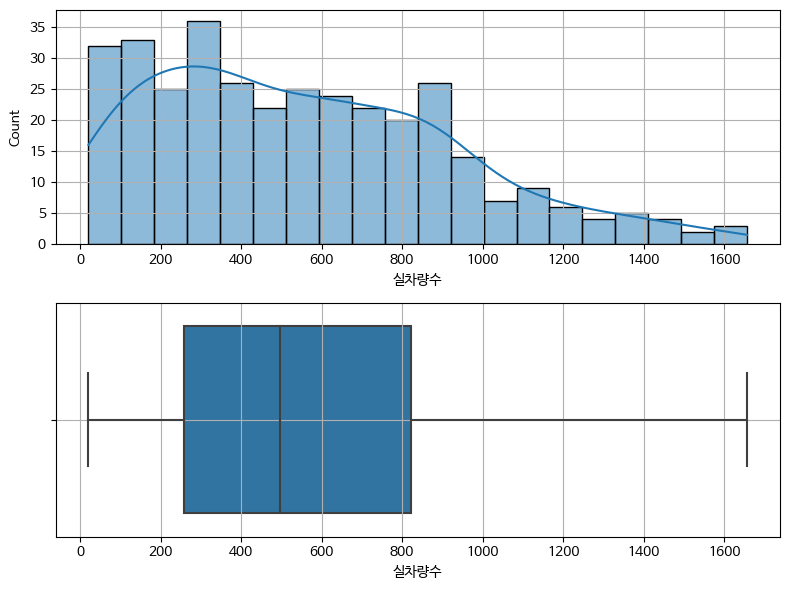

In [12]:
var= '실차량수'
eda_1_n(base_data, var)

#### 2) 총세대수

,count,mean,std,min,25%,50%,75%,max
총세대수,345.0,546.75942,432.359538,1.0,178.0,491.0,853.0,2289.0


----------------------------------------------------------------------


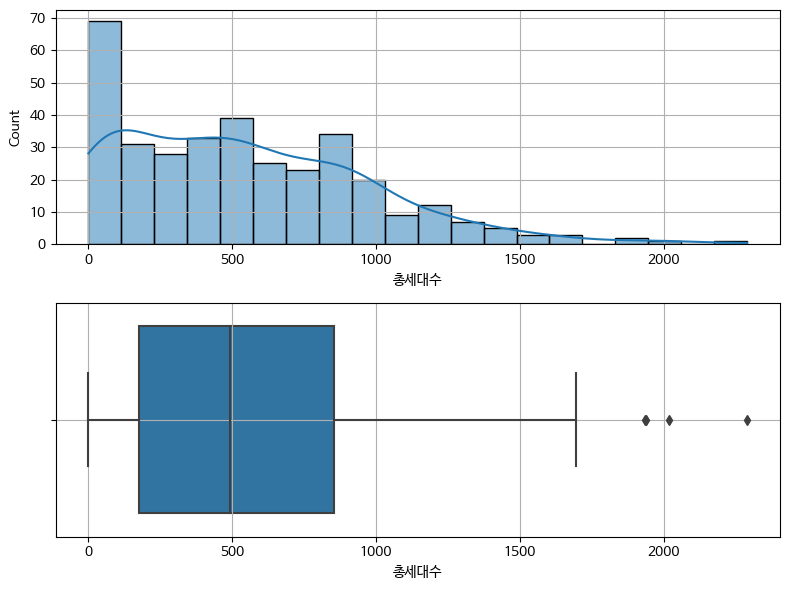

In [13]:
var= '총세대수'
eda_1_n(base_data, var)

#### 3) 총면적

,count,mean,std,min,25%,50%,75%,max
총면적,345.0,26324.872091,20983.244126,49.69,8483.26,23018.23,38910.14,112889.44


----------------------------------------------------------------------


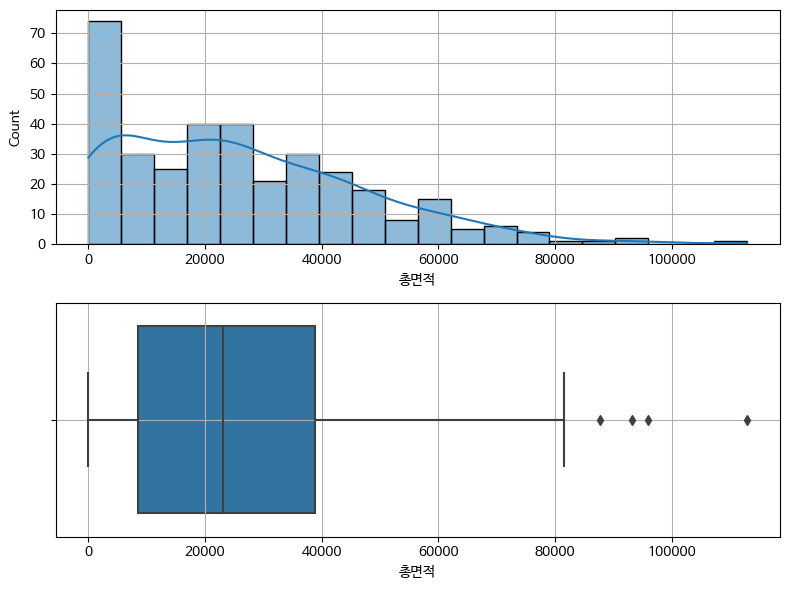

In [14]:
var= '총면적'
eda_1_n(base_data, var)

#### 4) 준공연도

,count,mean,std,min,25%,50%,75%,max
준공연도,345.0,2006.710145,8.169892,1970.0,2001.0,2008.0,2013.0,2022.0


----------------------------------------------------------------------


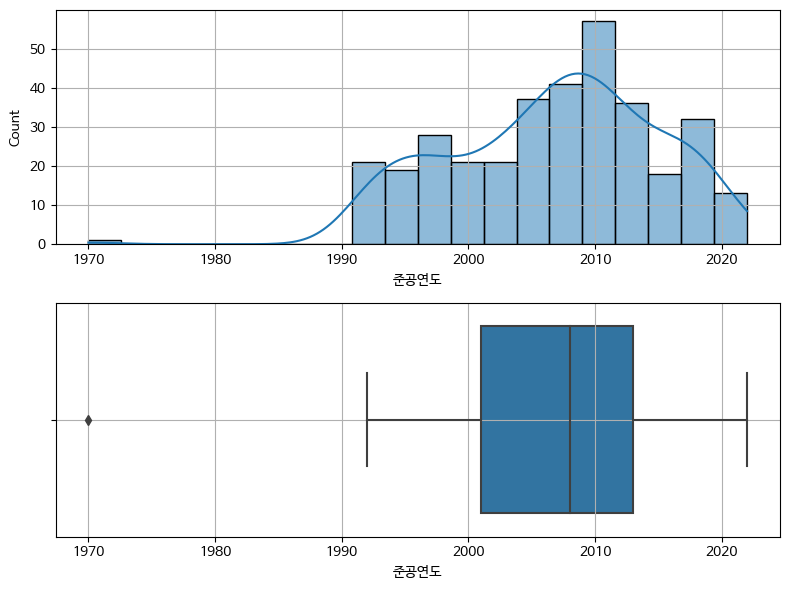

In [15]:
var= '준공연도'
eda_1_n(base_data, var)

#### 5) 임대료

,count,mean,std,min,25%,50%,75%,max
임대료,345.0,197729.05021,158760.777669,0.0,112905.0,172000.0,227564.0,950305.0


----------------------------------------------------------------------


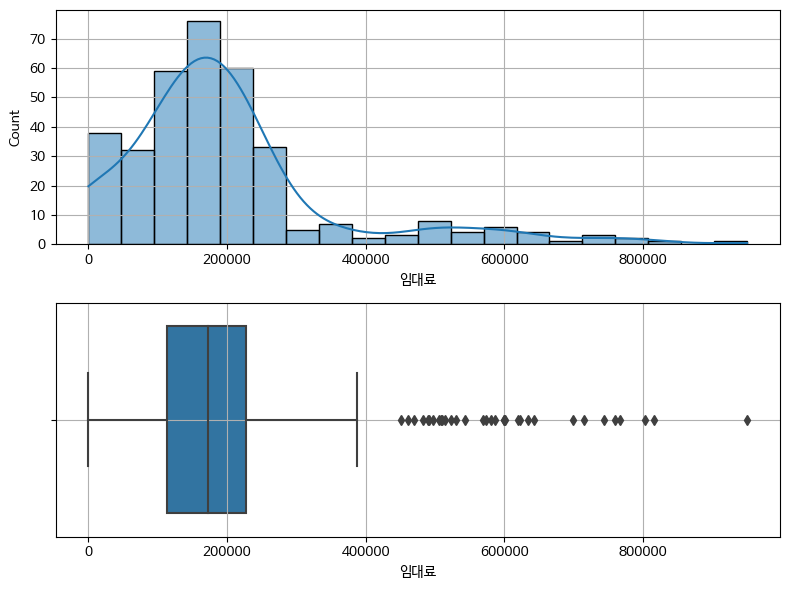

In [16]:
var= '임대료'
eda_1_n(base_data, var)

#### 6) 임대보증금

,count,mean,std,min,25%,50%,75%,max
임대보증금,345.0,2.382737e+07,2.247481e+07,0.0,1.272491e+07,19308500.0,28377000.0,1.898219e+08


----------------------------------------------------------------------


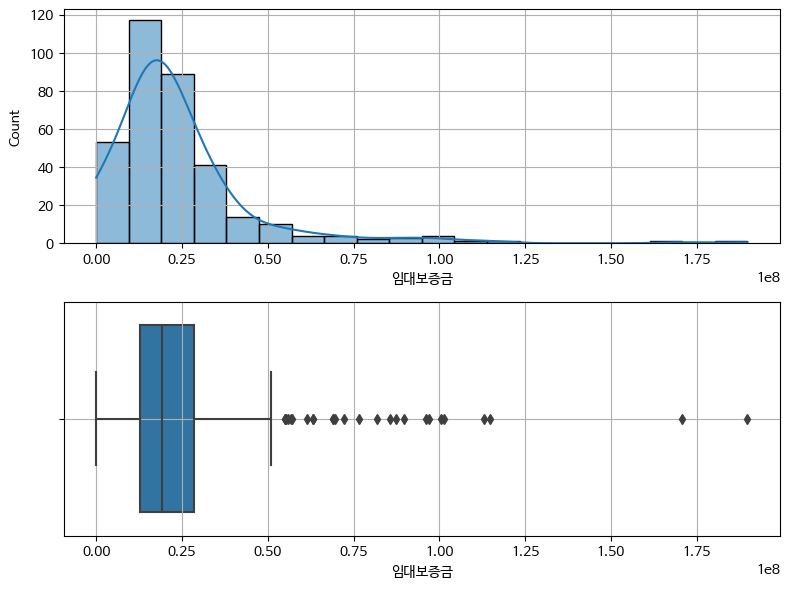

In [17]:
var= '임대보증금'
eda_1_n(base_data, var)

#### 7) 전용면적

In [18]:
temp = base_data.loc[:, ['단지코드','전용면적_10_30',  '전용면적_30_40', '전용면적_40_50', '전용면적_50_60', '전용면적_60_70', '전용면적_70_80', '전용면적_80_200']]

In [19]:
temp2 = pd.melt(temp, id_vars = '단지코드',
                value_vars = ['전용면적_10_30',  '전용면적_30_40', '전용면적_40_50', '전용면적_50_60', '전용면적_60_70', '전용면적_70_80', '전용면적_80_200'])
temp2.head()

,단지코드,variable,value
0,C0001,전용면적_10_30,0
1,C0002,전용면적_10_30,35
2,C0003,전용면적_10_30,0
3,C0004,전용면적_10_30,0
4,C0006,전용면적_10_30,15


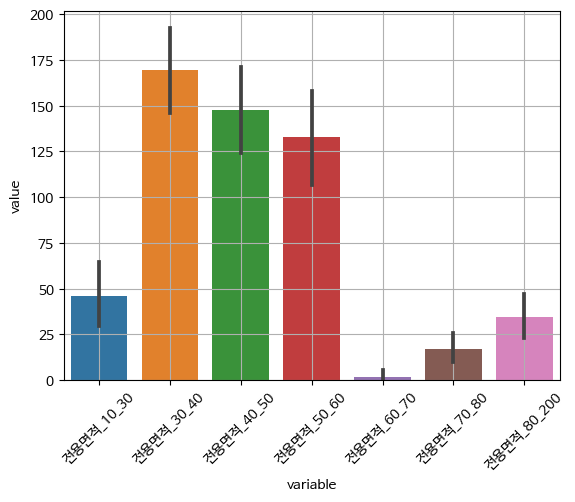

In [20]:
sns.barplot(x='variable', y='value', data = temp2)
plt.grid()
plt.xticks(rotation = 45)
plt.show()

#### 8) 지역

<< 지역 >>


,class,count,prop
0,경기,77,0.223188
1,대구경북,67,0.194203
2,광주전남,54,0.156522
3,부산울산,39,0.113043
4,서울,37,0.107246
5,대전충남,26,0.075362
6,경남,17,0.049275
7,강원,9,0.026087
8,충북,7,0.020290
9,전북,7,0.020290


----------------------------------------------------------------------


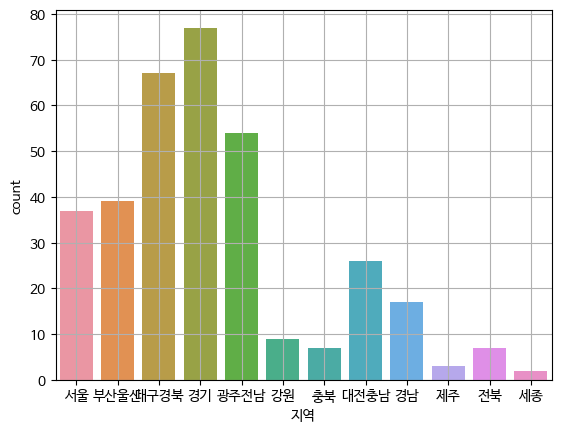

In [21]:
var = '지역'
eda_1_c(base_data, var)

#### 9) 건물형태

<< 건물형태 >>


,class,count,prop
0,복도식,194,0.572271
1,계단식,99,0.292035
2,혼합식,46,0.135693


----------------------------------------------------------------------


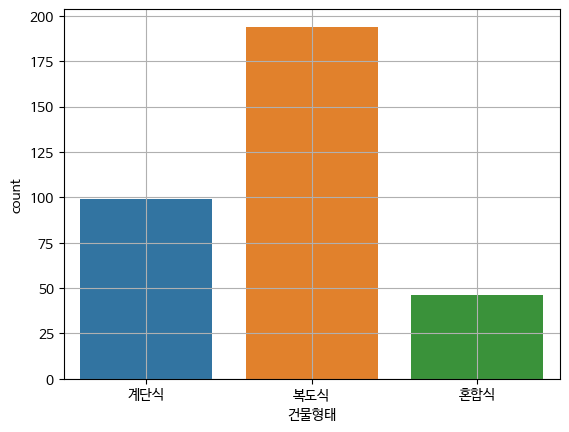

In [22]:
var = '건물형태'
eda_1_c(base_data, var)

#### 10) 난방방식

<< 난방방식 >>


,class,count,prop
0,개별가스난방,184,0.576803
1,지역난방,84,0.263323
2,지역가스난방,30,0.094044
3,중앙가스난방,14,0.043887
4,중앙난방,3,0.009404
5,중앙유류난방,2,0.006270
6,개별유류난방,1,0.003135
7,지역유류난방,1,0.003135


----------------------------------------------------------------------


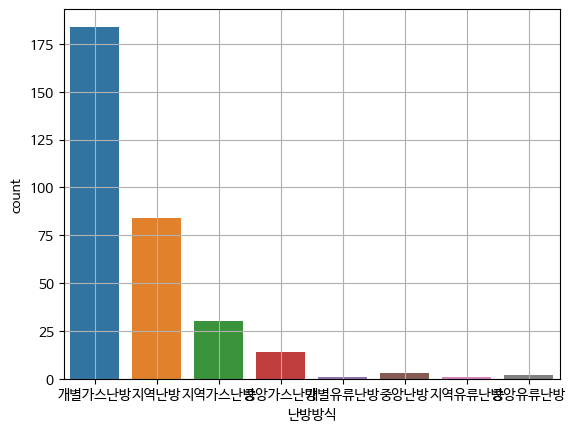

In [23]:
var = '난방방식'
eda_1_c(base_data, var)

#### 11) 승강기설치여부

<< 승강기설치여부 >>


,class,count,prop
0,전체동 설치,310,0.962733
1,미설치,10,0.031056
2,일부동 설치,2,0.006211


----------------------------------------------------------------------


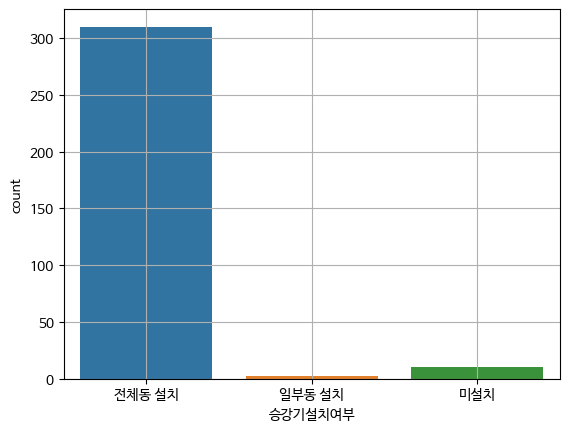

In [24]:
var = '승강기설치여부'
eda_1_c(base_data, var)

### (3) 이변량 분석

* **세부 요구사항**
    - 숫자형 feature --> target
        - 전체 변수들 간의 상관관계 구하기
            * 범주형 변수를 제외한 데이터셋을 이용하여
            * df.corr() + sns.heatmap() 으로 전체 상관계수를 시각화 합니다.
        - 등록차량수와 상관계수가 높은 상위 3~5개에 대해서 산점도를 그려 봅시다.
    - 범주형 feature --> target
        * 지역 : sns.barplot()으로 시각화 해 봅시다.

#### 1) 전체 숫자형 변수들 간의 상관관계

In [25]:
base_data.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_60,전용면적_60_70,전용면적_70_80,전용면적_80_200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,4393.14,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,983.22,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,5244.69,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,34607.34,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,309.50,15,0,0,0,0,0,0,5.522750e+07,340148.333333


In [26]:
cols_num = ['총세대수', '실차량수','총면적','전용면적_10_30','전용면적_30_40','전용면적_40_50',
            '전용면적_50_60','전용면적_60_70','전용면적_70_80','전용면적_80_200','임대보증금','임대료']
temp = base_data.loc[:, cols_num]

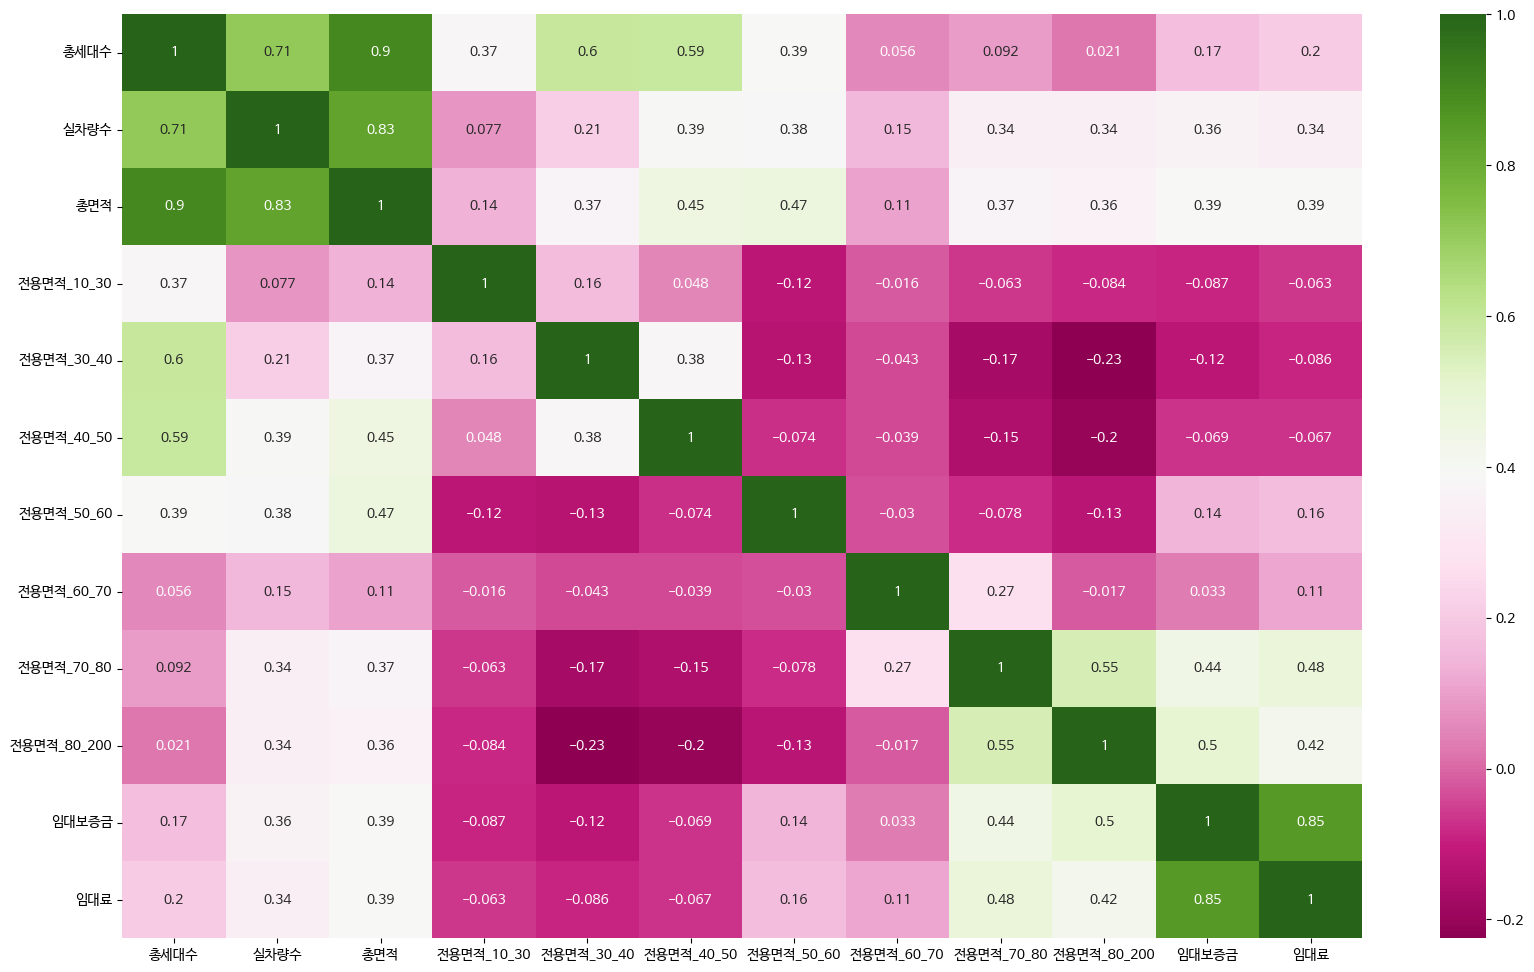

In [27]:
plt.figure(figsize = (20,12))
sns.heatmap(temp.corr(),cmap="PiYG", annot=True)
plt.show()

실차량수와 상관관계가 높은 변수 : 총 세대수, 총 면적

#### 2) 숫자형 feature --> 실차량수

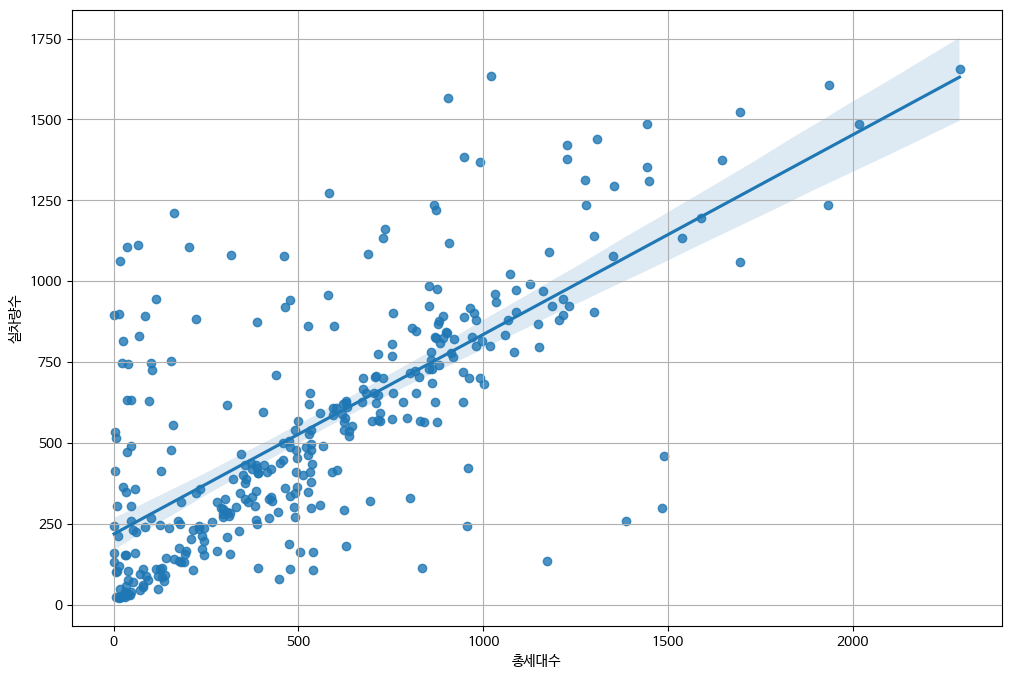

In [28]:
feature = '총세대수'
target = '실차량수'

plt.figure(figsize = (12,8))
sns.regplot(x = feature, y= target, data = base_data)
plt.grid()
plt.show()

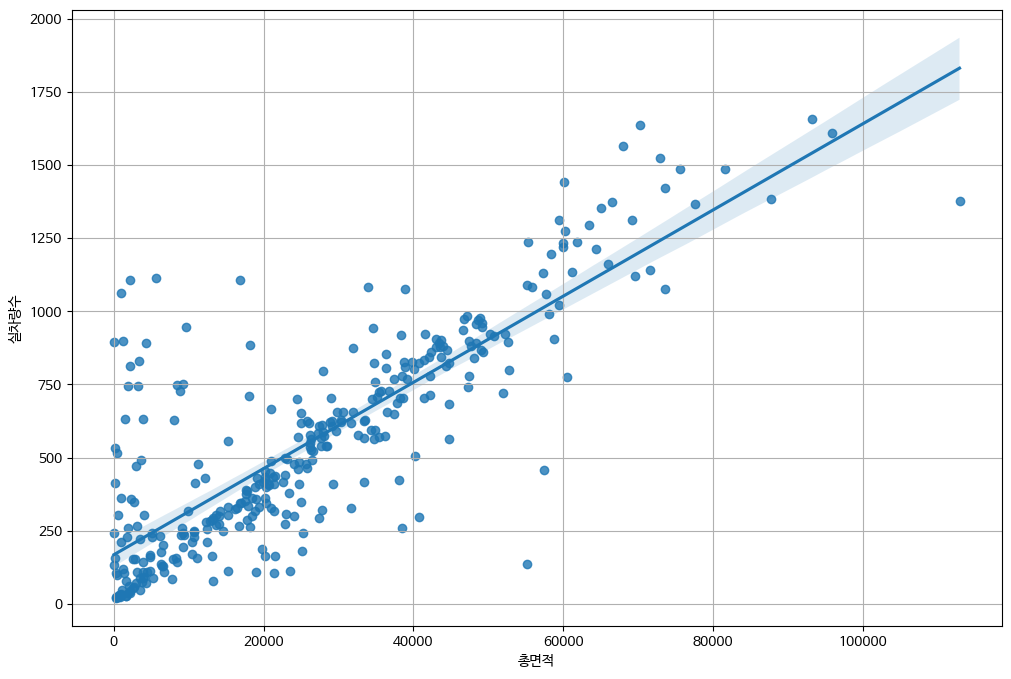

In [29]:
feature = '총면적'

plt.figure(figsize = (12,8))
sns.regplot(x = feature, y= target, data = base_data)
plt.grid()
plt.show()

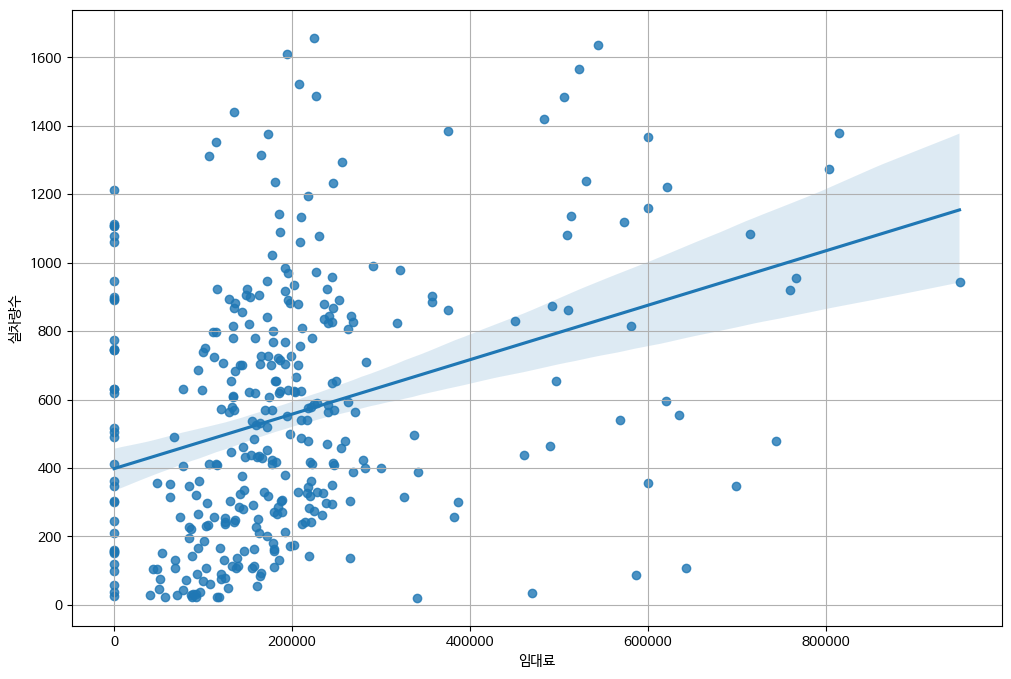

In [30]:
feature = '임대료'

plt.figure(figsize = (12,8))
sns.regplot(x = feature, y= target, data = base_data)
plt.grid()
plt.show()

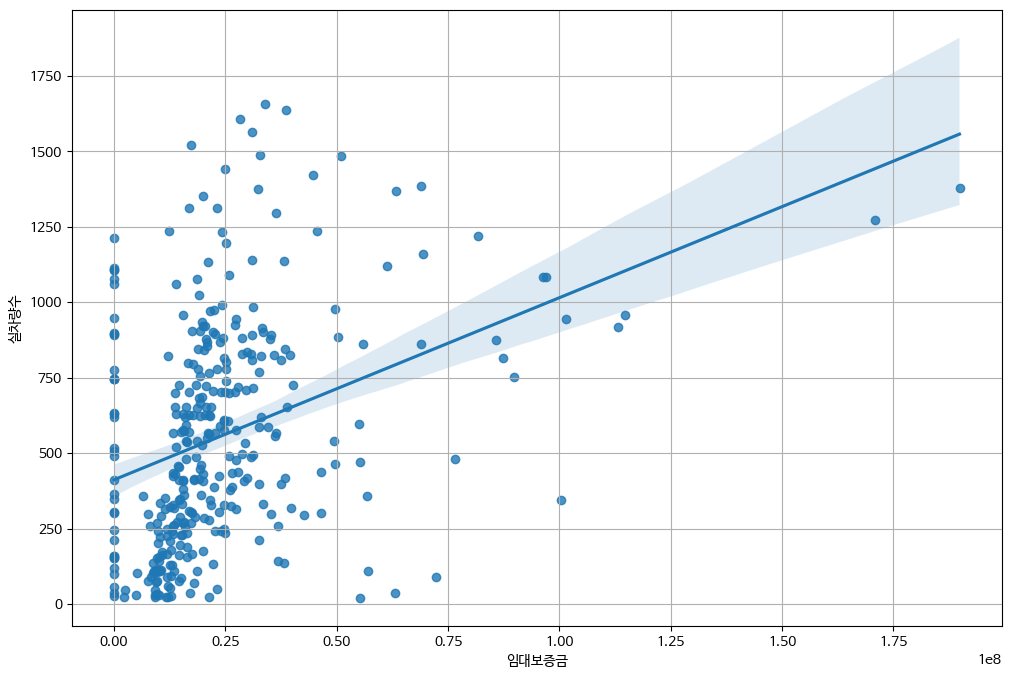

In [31]:
feature = '임대보증금'

plt.figure(figsize = (12,8))
sns.regplot(x = feature, y= target, data = base_data)
plt.grid()
plt.show()

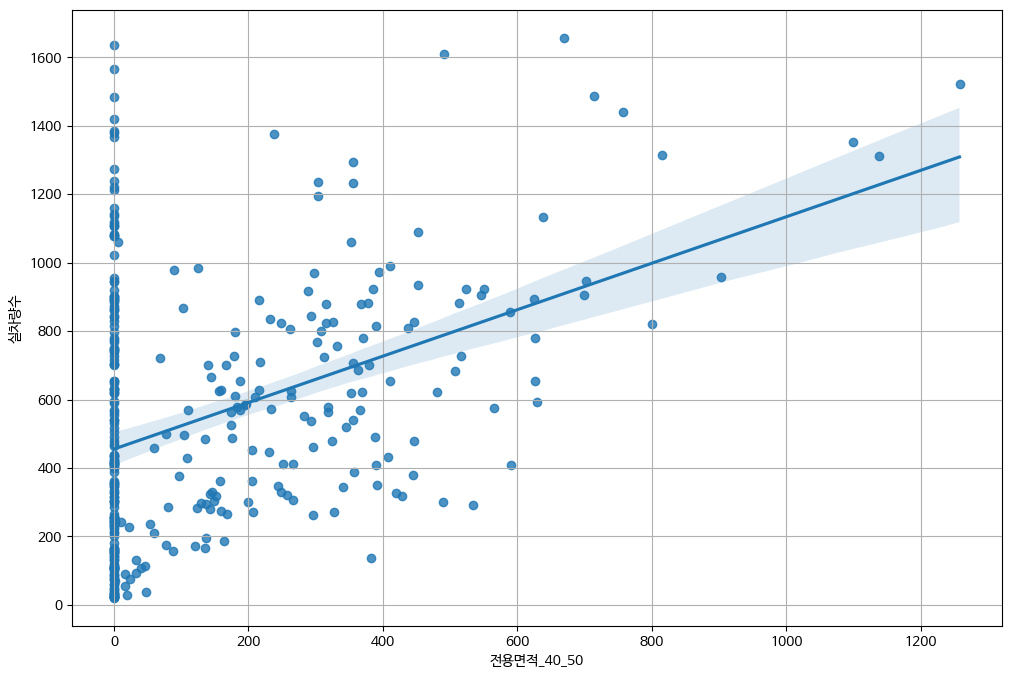

In [32]:
feature = '전용면적_40_50'

plt.figure(figsize = (12,8))
sns.regplot(x = feature, y= target, data = base_data)
plt.grid()
plt.show()

#### 3) 범주형 feature --> 실차량수

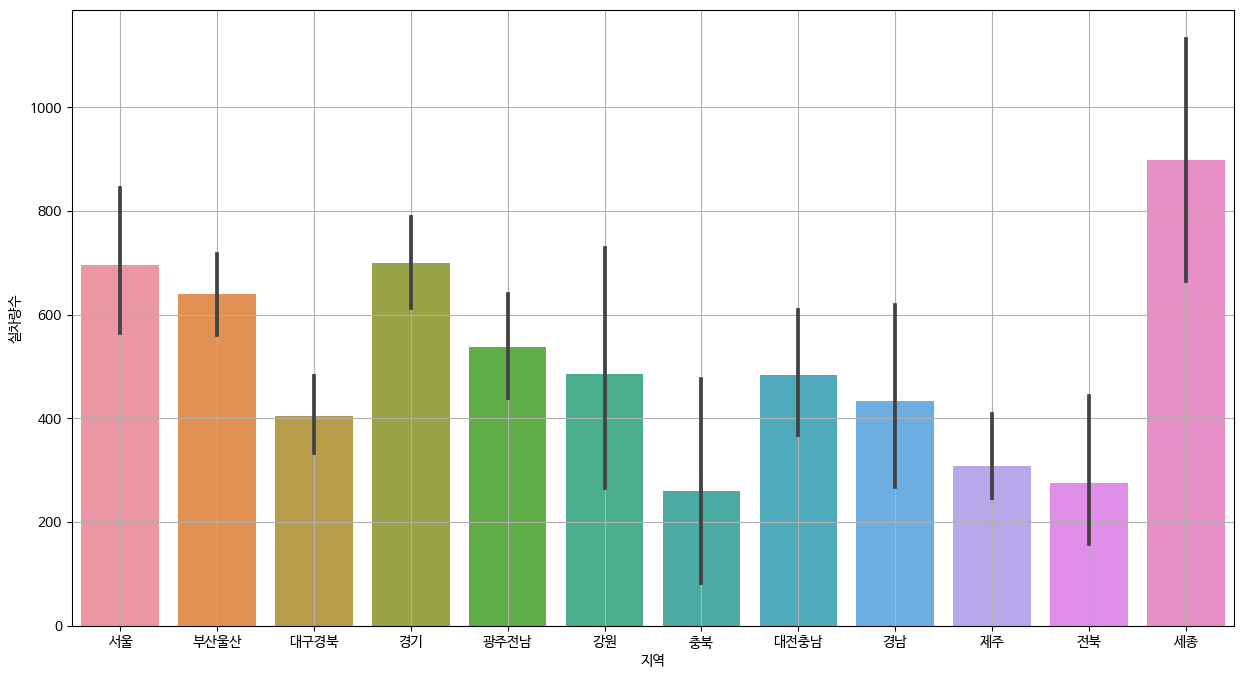

In [33]:
feature = '지역'
plt.figure(figsize = (15,8))
sns.barplot(x=feature, y= target, data = base_data)
plt.grid()
plt.show()

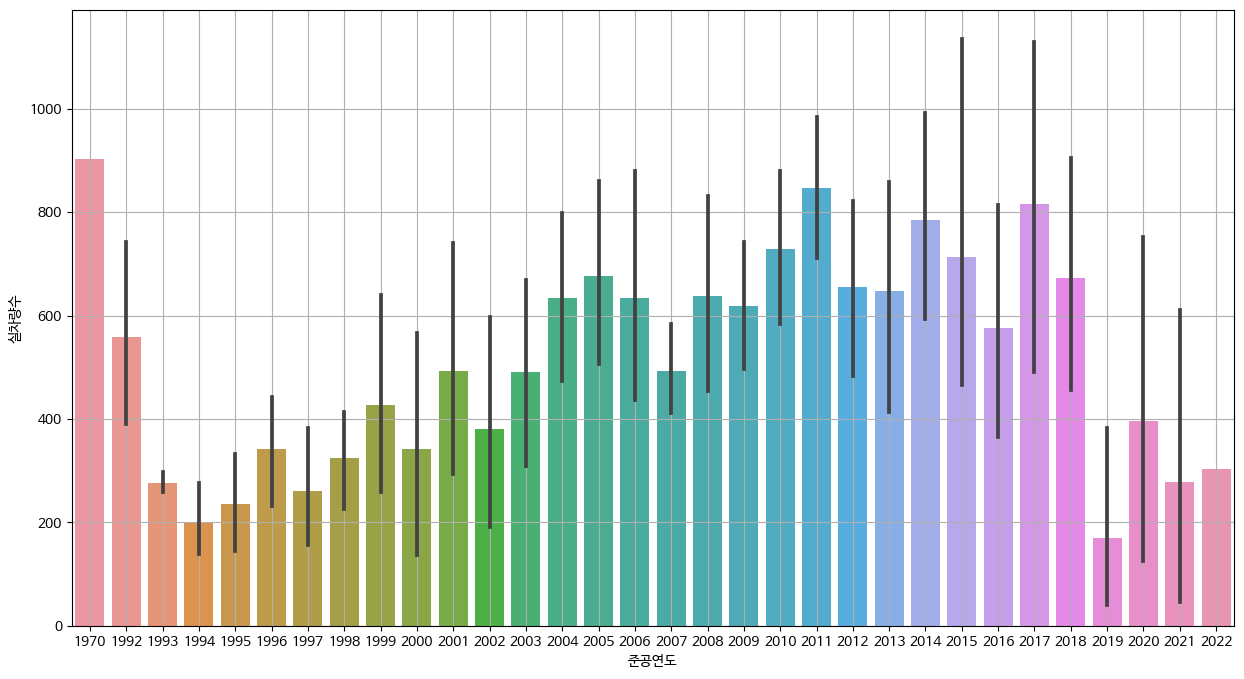

In [34]:
feature = '준공연도'
plt.figure(figsize = (15,8))
sns.barplot(x=feature, y= target, data = base_data)
plt.grid()
plt.show()

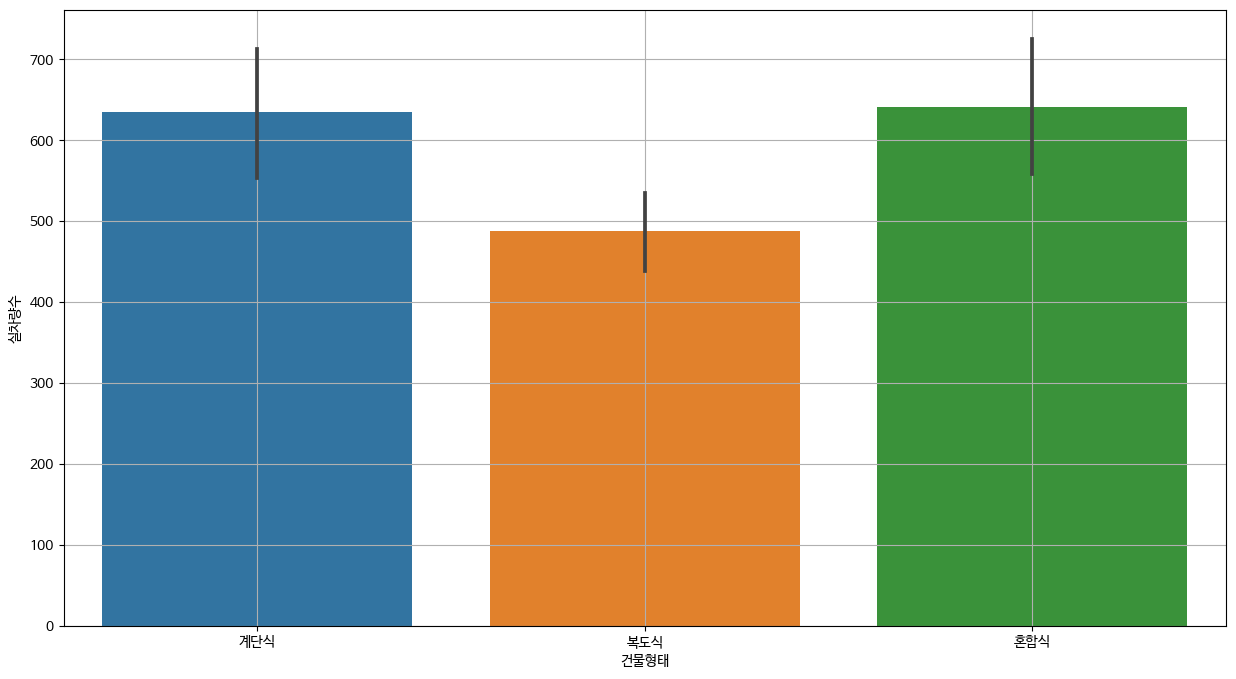

In [35]:
feature = '건물형태'
plt.figure(figsize = (15,8))
sns.barplot(x=feature, y= target, data = base_data)
plt.grid()
plt.show()

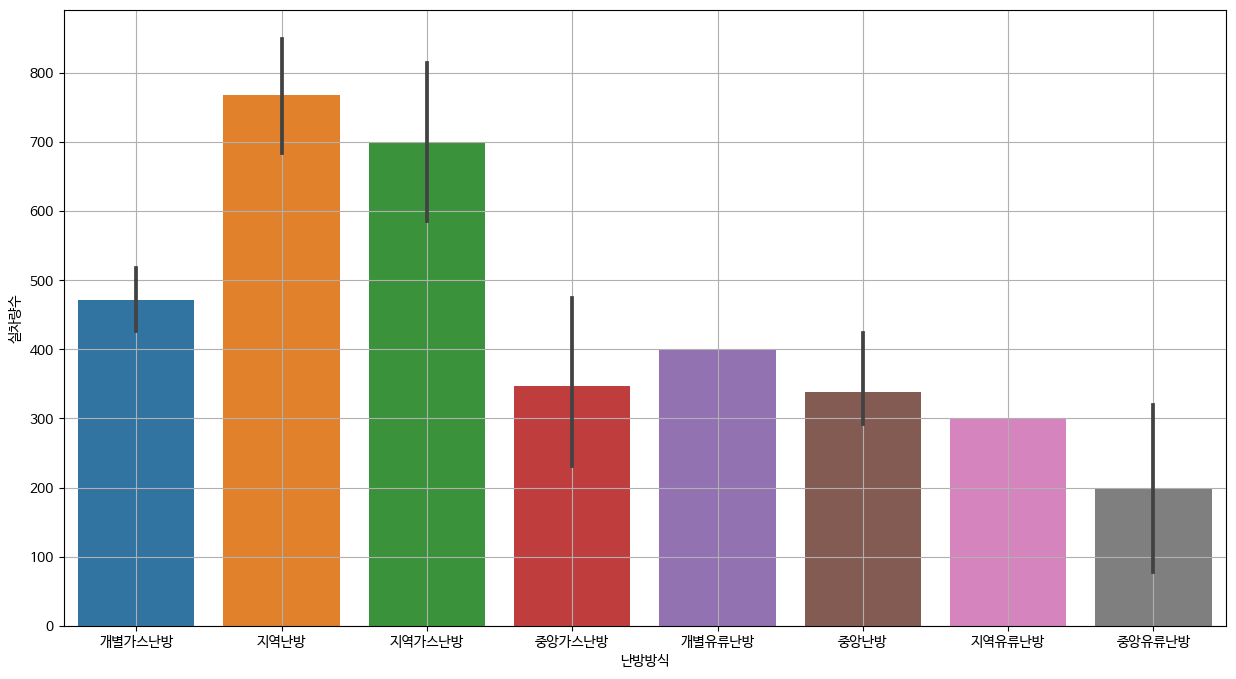

In [36]:
feature = '난방방식'
plt.figure(figsize = (15,8))
sns.barplot(x=feature, y= target, data = base_data)
plt.grid()
plt.show()

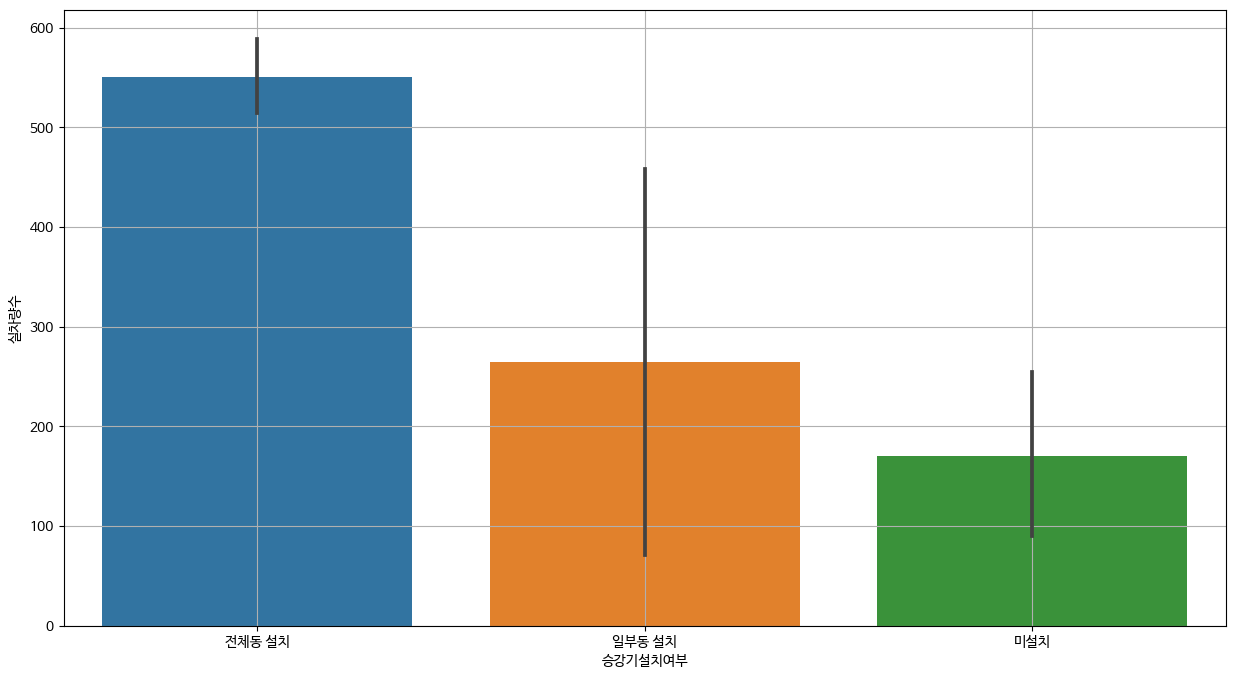

In [37]:
feature = '승강기설치여부'
plt.figure(figsize = (15,8))
sns.barplot(x=feature, y= target, data = base_data)
plt.grid()
plt.show()

## 3.전처리_추가

* **세부요구사항**
    * 난방방식, 승강기설치여부 두 변수에 대해서 적은 수의 범주를 묶는 작업을 시도하시오.
    * 지역 : 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 삭제 합니다.

* 난방방식

In [38]:
# 난방방식 : 중앙, 지역, 개별 세가지로 묶기
base_data['난방방식'] = base_data['난방방식'].map({'개별가스난방':'개별', '지역난방':'지역', '지역가스난방':'지역', 
                                          '중앙가스난방':'중앙', '개별유류난방':'개별', '중앙난방':'중앙',
                                          '지역유류난방':'지역', '중앙유류난방':'중앙'})

In [39]:
base_data['난방방식'].unique()

array(['개별', '지역', nan, '중앙'], dtype=object)

* 승강기설치여부

In [40]:
base_data['승강기설치여부'].unique()

array(['전체동 설치', nan, '일부동 설치', '미설치'], dtype=object)

In [41]:
# 난방방식 : 중앙, 지역, 개별 세가지로 묶기
base_data['승강기설치여부'] = base_data['승강기설치여부'].map({'전체동 설치':1, '일부동 설치':0, '미설치':0})

In [42]:
base_data['승강기설치여부'].unique()

array([ 1., nan,  0.])

* 지역 제거

In [43]:
base_data.drop('지역', axis = 1, inplace = True)

## 4.데이터 저장

* **세부 요구사항**
    * joblib.dump를 이용하시오.
    * 저장할 파일의 확장자는 보통 .pkl 입니다.

In [44]:
joblib.dump(base_data, path + 'base_data2.pkl')

['/content/drive/MyDrive/project/base_data2.pkl']